In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"E:\shaaaa\Downloads\project2.xlsx")

In [4]:
print(df.head())


print(df.info())
print(df.describe())

   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore
0      1  Reliance Inds.        583436.72           99810.00
1      2             TCS        563709.84           30904.00
2      3       HDFC Bank        482953.59           20581.27
3      4             ITC        320985.27            9772.02
4      5         H D F C        289497.37           16840.51
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB
None
            S.No.  Mar Cap - Crore  Sales Qtr - Crore
count  488.000000       479.000000         459.000000
mean   251.508197     28043.857119        3807.789412
std    145.8

In [5]:
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64


In [7]:
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64


In [8]:
# Calculate the average market cap per sales unit for non-null entries
market_cap_per_sales_unit = df.loc[df['Sales Qtr - Crore'] > 0, 'Mar Cap - Crore'] / df.loc[df['Sales Qtr - Crore'] > 0, 'Sales Qtr - Crore']
average_market_cap_per_sales = market_cap_per_sales_unit.mean()

# Fill null values in 'Mar Cap - Crore' using the average market cap per sales unit
df['Mar Cap - Crore'] = df.apply(
    lambda row: row['Mar Cap - Crore'] if pd.notnull(row['Mar Cap - Crore']) else average_market_cap_per_sales * row['Sales Qtr - Crore'],
    axis=1
)

# Fill null values in 'Sales Qtr - Crore' using the median sales value
median_sales = df['Sales Qtr - Crore'].median()
df['Sales Qtr - Crore'].fillna(median_sales, inplace=True)


In [9]:
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
S.No.                0
Name                 0
Mar Cap - Crore      9
Sales Qtr - Crore    0
dtype: int64


In [11]:
 
market_cap_per_sales_unit = df.loc[df['Mar Cap - Crore'].notnull(), 'Mar Cap - Crore'] / df.loc[df['Mar Cap - Crore'].notnull(), 'Sales Qtr - Crore']
average_market_cap_per_sales = market_cap_per_sales_unit.mean()

# Fill null values in 'Mar Cap - Crore' using the average market cap per sales unit
df['Mar Cap - Crore'] = df.apply(
    lambda row: row['Mar Cap - Crore'] if pd.notnull(row['Mar Cap - Crore']) else average_market_cap_per_sales * row['Sales Qtr - Crore'],
    axis=1
)

In [12]:
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64


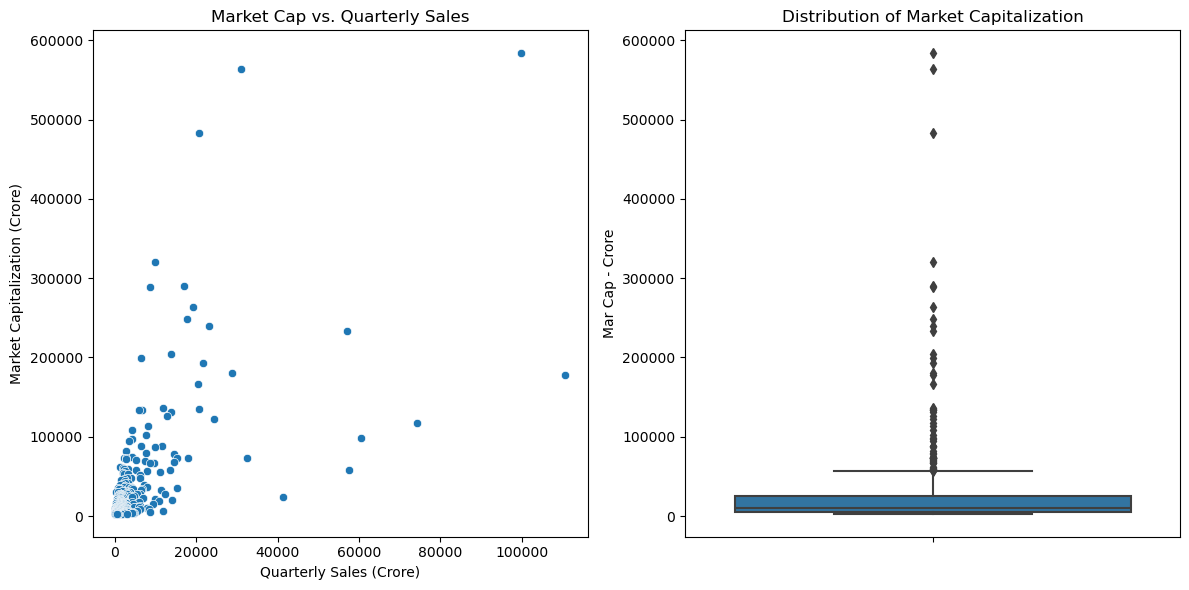

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot of Market Cap vs. Sales
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Sales Qtr - Crore', y='Mar Cap - Crore')
plt.title('Market Cap vs. Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Capitalization (Crore)')

# Box plot to visualize distribution of Market Cap
plt.subplot(1, 2, 2)
sns.boxplot(y='Mar Cap - Crore', data=df)
plt.title('Distribution of Market Capitalization')

plt.tight_layout()
plt.show()

C:\Users\shaaaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

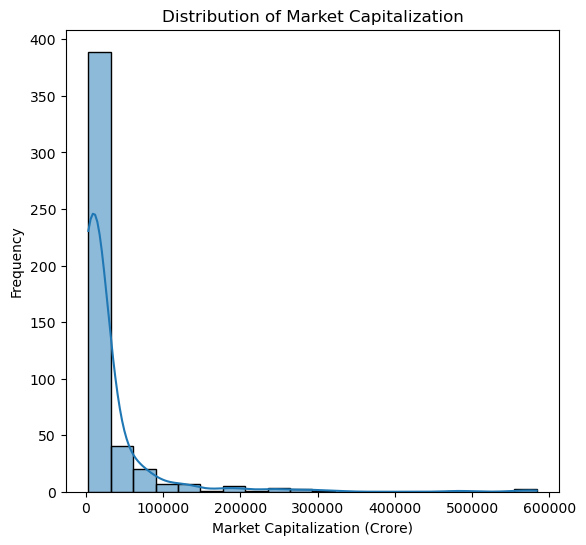

In [14]:
# Visualizations
plt.figure(figsize=(14, 6))

# Histogram of Market Capitalization
plt.subplot(1, 2, 1)
sns.histplot(df['Mar Cap - Crore'], bins=20, kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')


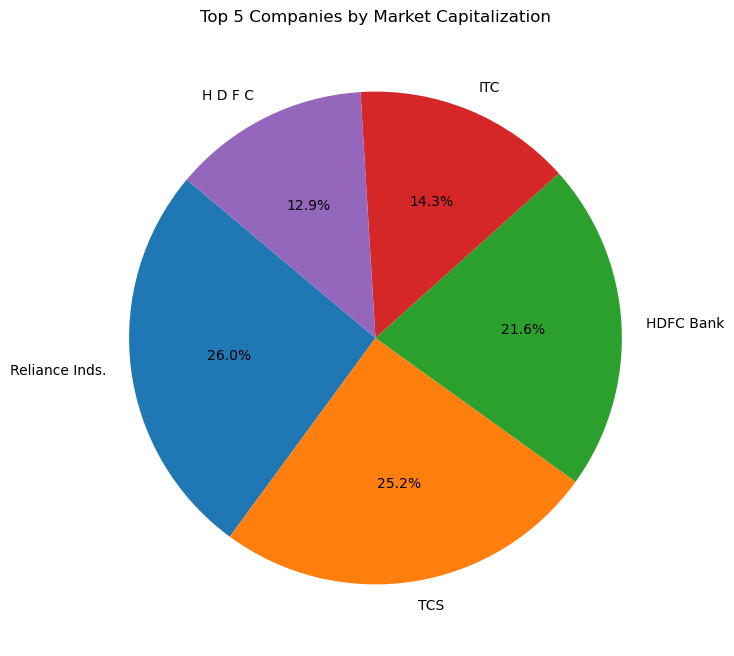

In [21]:
# Clean the data
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
df.dropna(subset=['Mar Cap - Crore'], inplace=True)  

# Ensure the 'Mar Cap - Crore' column is of numeric type
df['Mar Cap - Crore'] = pd.to_numeric(df['Mar Cap - Crore'])

# Visualize the top 5 companies by Market Cap using a pie chart
top_5_companies = df.nlargest(5, 'Mar Cap - Crore')

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_companies['Mar Cap - Crore'],
    labels=top_5_companies['Name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 5 Companies by Market Capitalization')
plt.show()

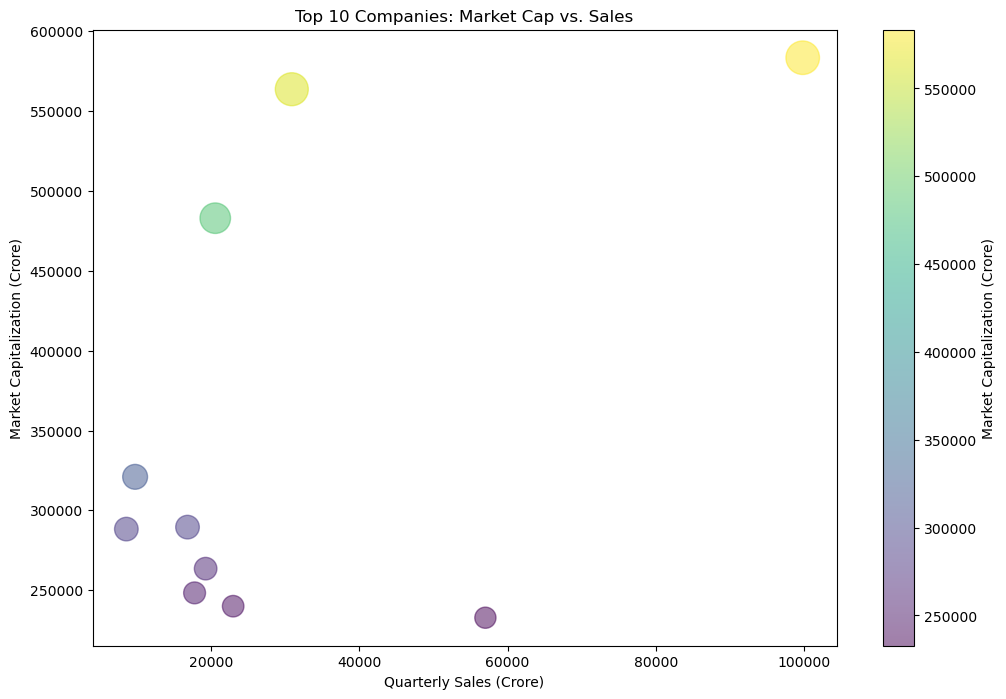

In [23]:
# Bubble Chart for Top 10 Companies
top_10_companies = df.nlargest(10, 'Mar Cap - Crore')
plt.figure(figsize=(12, 8))
plt.scatter(
    data=top_10_companies,
    x='Sales Qtr - Crore',
    y='Mar Cap - Crore',
    s=top_10_companies['Mar Cap - Crore'] / 1000,  # Size of bubbles scaled
    alpha=0.5,
    c='Mar Cap - Crore',
    cmap='viridis'
)
plt.colorbar(label='Market Capitalization (Crore)')
plt.title('Top 10 Companies: Market Cap vs. Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Capitalization (Crore)')
plt.show()


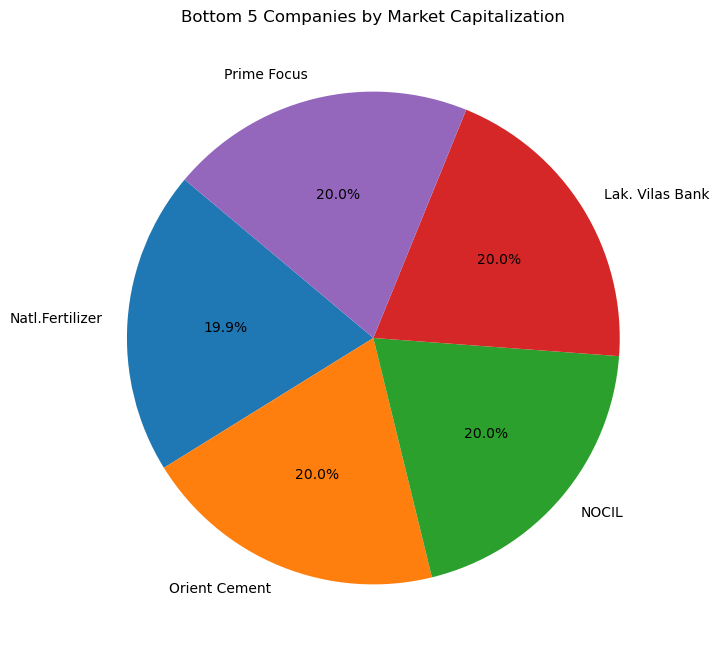

In [25]:
# Bottom 5 companies
bottom_5_companies = df.nsmallest(5, 'Mar Cap - Crore')

# Pie Chart for Bottom 5 Companies
plt.figure(figsize=(8, 8))
plt.pie(
    bottom_5_companies['Mar Cap - Crore'],
    labels=bottom_5_companies['Name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Bottom 5 Companies by Market Capitalization')
plt.show()


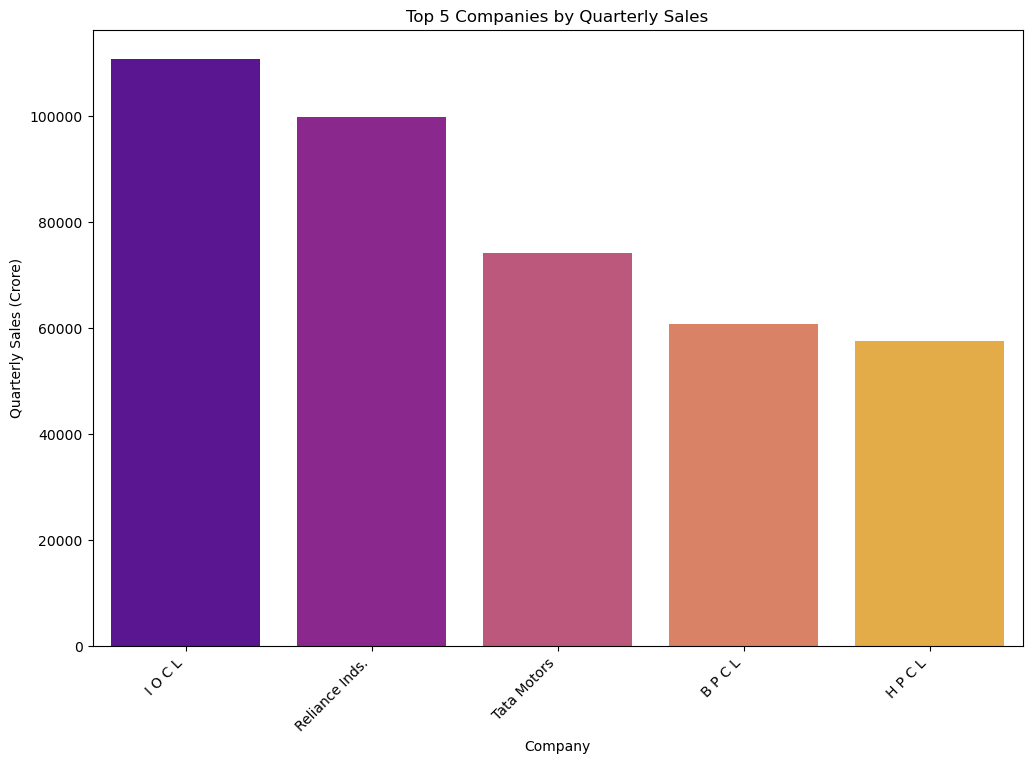

In [26]:
# Top 5 companies by sales
top_5_sales_companies = df.nlargest(5, 'Sales Qtr - Crore')

# Bar plot for Top 5 Companies by Sales
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_sales_companies, x='Name', y='Sales Qtr - Crore', palette='plasma')
plt.title('Top 5 Companies by Quarterly Sales')
plt.xlabel('Company')
plt.ylabel('Quarterly Sales (Crore)')
plt.xticks(rotation=45, ha='right')
plt.show()

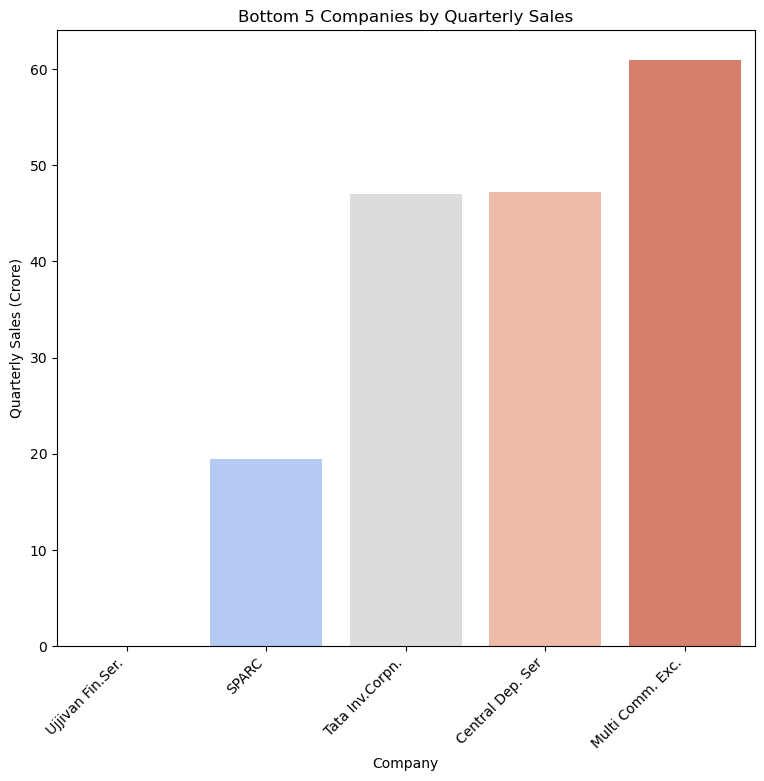

In [28]:
# Bottom 5 companies by sales
bottom_5_sales_companies = df.nsmallest(5, 'Sales Qtr - Crore')

# Bar plot for Bottom 5 Companies by Sales
plt.figure(figsize=(9, 8))
sns.barplot(data=bottom_5_sales_companies, x='Name', y='Sales Qtr - Crore', palette='coolwarm')
plt.title('Bottom 5 Companies by Quarterly Sales')
plt.xlabel('Company')
plt.ylabel('Quarterly Sales (Crore)')
plt.xticks(rotation=45, ha='right')
plt.show()